In [1]:
from fastai.vision.all import *
from fastbook import *
import torch

In [2]:
path = untar_data(URLs.MNIST_SAMPLE); path

Path('/home/abhilash/.fastai/data/mnist_sample')

In [3]:
paths_train_3 = (path/'train/3').ls(); paths_train_3

(#6131) [Path('/home/abhilash/.fastai/data/mnist_sample/train/3/47123.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/21559.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/17103.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/59660.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/59408.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/20738.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/8195.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/15109.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/54568.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/21075.png')...]

In [4]:
paths_train_7 = (path/'train/7').ls(); paths_train_7

(#6265) [Path('/home/abhilash/.fastai/data/mnist_sample/train/7/7420.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/9878.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/47453.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/18966.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/27005.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/31957.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/14379.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/5811.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/33104.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/43686.png')...]

In [5]:
len(paths_train_3), len(paths_train_7)

(6131, 6265)

In [6]:
train_3_tnrs = [tensor(Image.open(p)) for p in paths_train_3]; len(train_3_tnrs)

6131

In [7]:
train_7_tnrs = [tensor(Image.open(p)) for p in paths_train_7]; len(train_7_tnrs)

6265

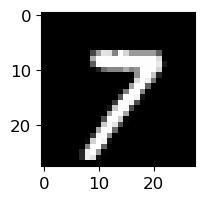

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(train_7_tnrs[0], cmap='gray')

In [9]:
train_7_stack = torch.stack(train_7_tnrs); train_7_stack.shape

torch.Size([6265, 28, 28])

In [10]:
train_3_stack = torch.stack(train_3_tnrs); train_3_stack.shape

torch.Size([6131, 28, 28])

In [11]:
train_3_flat = train_3_stack.flatten(1); train_3_flat.shape

torch.Size([6131, 784])

In [12]:
train_7_flat = train_7_stack.flatten(1); train_7_flat.shape

torch.Size([6265, 784])

In [13]:
x_train = torch.cat([train_3_flat, train_7_flat]); x_train.shape

torch.Size([12396, 784])

In [14]:
x_train = x_train.float(); x_train.shape

torch.Size([12396, 784])

In [15]:
y_train = tensor([1]*len(train_3_tnrs) + [0]*len(train_7_tnrs)).float().unsqueeze(1); y_train.shape

torch.Size([12396, 1])

In [16]:
x_train[0] @ torch.randn(x_train.shape[1], 1)

tensor([-1438.9381])

In [17]:
def init_params(shape): return torch.randn(shape).requires_grad_()

In [18]:
def linear1(xb): return xb@weights + bias

In [19]:
def mnist_loss(preds, trgts):
    preds = preds.sigmoid()
    return torch.where(trgts==1.0, 1 - preds, preds).mean()

In [20]:
ds = list((zip(x_train, y_train))); len(ds)

12396

In [ ]:
len(ds[0]), len(ds[1])